In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

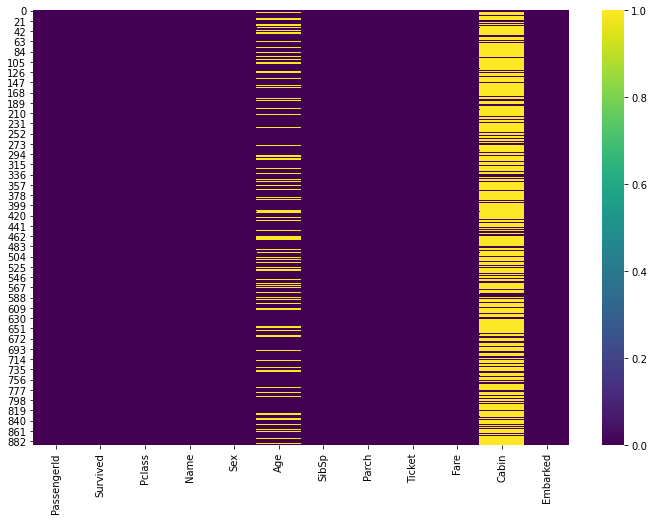

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

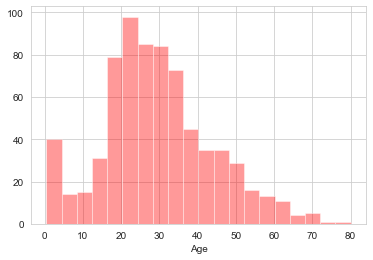

In [5]:
sns.set_style('whitegrid')
sns.distplot((train['Age'].dropna()),kde=False,color='red',bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

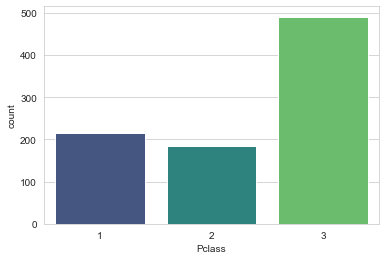

In [6]:
sns.countplot(x='Pclass',data=train,palette='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

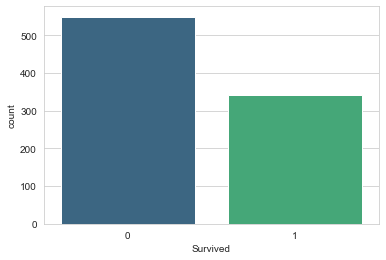

In [7]:
sns.countplot(x='Survived',data=train,palette='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

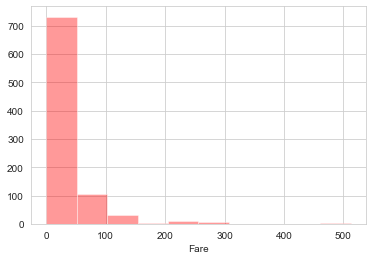

In [8]:
sns.distplot((train['Fare'].dropna()),kde=False,color='red',bins=10)

In [9]:
def average_age(column):
    pclass=column[0]
    age=column[1]
    if pd.isnull(age):
        return round(train[train['Pclass']==pclass]['Age'].mean(),ndigits=0)
    else:
        return age

In [10]:
train['Age']=train[['Pclass','Age']].apply(average_age,axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

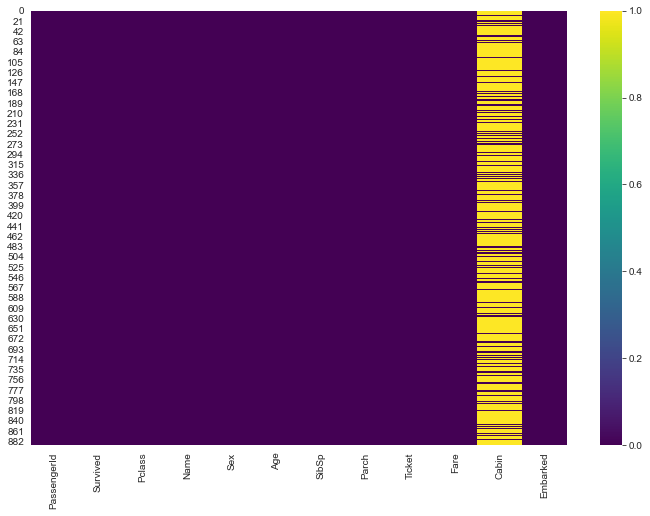

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cmap='viridis')

In [18]:
train.drop('Cabin',axis=1,inplace=True)

In [22]:
train.dropna(inplace=True)

<AxesSubplot:>

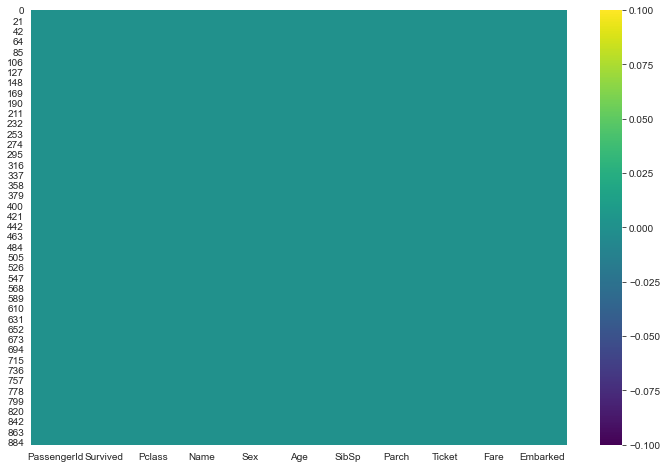

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cmap='viridis')

In [25]:
def embark_func(col):
    embark_val=col[0]
    if embark_val=='S':
        return 1
    elif embark_val=='C':
        return 2
    elif embark_val=='Q':
        return 3

In [27]:
train['Embarked']=train['Embarked'].apply(embark_func)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [29]:
sex=pd.get_dummies(train['Sex'])
sex.drop('female',axis=1,inplace=True)

In [30]:
train=pd.concat([train,sex],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,1


In [32]:
train.drop(['PassengerId','Ticket','Sex','Name'],axis=1,inplace=True)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,2,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,1,1


In [34]:
y_train=train['Survived']
train.drop('Survived',inplace=True,axis=1)

In [35]:
X_train=train

In [37]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,22.0,1,0,7.2500,1,1
1,1,38.0,1,0,71.2833,2,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,1,1


## Training Data Completed

In [38]:
test = pd.read_csv('titanic_test.csv')

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:>

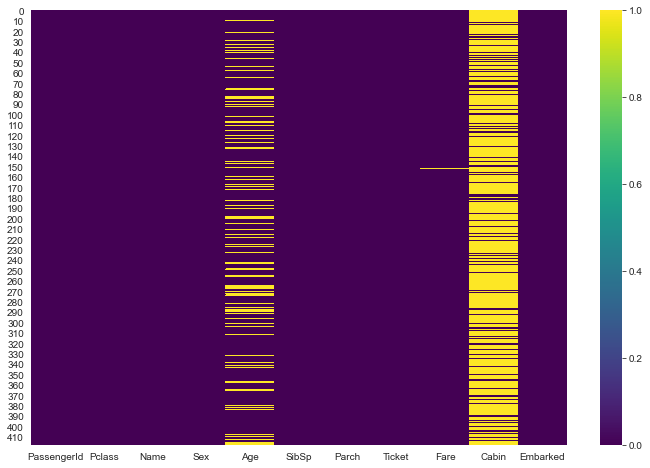

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(test.isnull(),cmap='viridis')

In [42]:
test['Age']=test[['Pclass','Age']].apply(average_age,axis=1)

In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
test.drop('Cabin',axis=1,inplace=True)

In [47]:
test.dropna(inplace=True)

<AxesSubplot:>

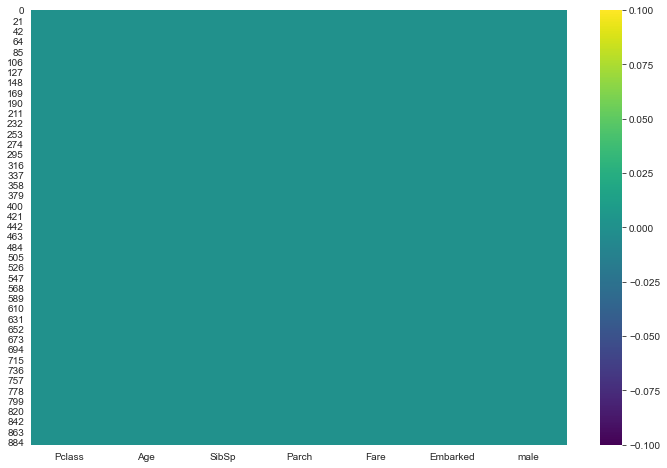

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cmap='viridis')

In [49]:
test['Embarked']=test['Embarked'].apply(embark_func)

In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1


In [51]:
sex=pd.get_dummies(test['Sex'])
sex.drop('female',axis=1,inplace=True)

In [52]:
test=pd.concat([test,sex],axis=1)

In [57]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,3,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,3,1
3,3,27.0,0,0,8.6625,1,1
4,3,22.0,1,1,12.2875,1,0


In [55]:
test.drop(['PassengerId','Ticket','Sex','Name'],axis=1,inplace=True)

In [58]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,3,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,3,1
3,3,27.0,0,0,8.6625,1,1
4,3,22.0,1,1,12.2875,1,0


In [59]:
X_test=test

In [61]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,3,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,3,1
3,3,27.0,0,0,8.6625,1,1
4,3,22.0,1,1,12.2875,1,0


In [62]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,22.0,1,0,7.2500,1,1
1,1,38.0,1,0,71.2833,2,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,1,1


In [66]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel=LogisticRegression()

In [69]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [70]:
survival=logmodel.predict(X_test)

In [73]:
Survival=pd.DataFrame(survival,columns=['Survival'])

In [75]:
Survival.head()

,Survival
0,0
1,0
2,0
3,0
4,1
